<div style="text-align: right"> CS824 - Lab 7a (2022) </div>

## Lab 7a - PCA (A basic Introduction)

To provide an introduction to PCA in Python I have adatped material from a tutorial developed by Jake VanderPlas for his [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do).  Jake does an excellent job of providing an overview of what can be a complex topic and I have only modified this a little and added some 'exercise' elements to help you focus on some tasks of your own, rather than simply following a set of pre-determined steps...  If you have come across this tutorial before then you may wish to move directly to the 'SUBMIT' cells.

The initial example use the well-known **'NMIST'** data (of hand-written digits) and towards the end of the tutorial there are also a couple of examples using the **'Eigen-faces'** data set. 

As noted on Jake's web site - "the text is released under the CC-BY-NC-ND license, and code is released under the MIT license. If you find this content useful, please consider supporting the work by [buying the book!](http://shop.oreilly.com/product/0636920034919.do)"


Principal component analysis (PCA) is sometimes referred to as an unsupervised learning algorithm, but the approach pre-dates the advent of machine learning (by about a century!) and should be thought of fundamentally as a dimensionality reduction technique. It is also useful as a tool for data visualization, for noise filtering, for feature extraction and engineering.

The material below contains a brief conceptual discussion of the PCA algorithm, and then introduces a couple of examples of these types of applications.


In [1]:
# Make sure you have loaded the 'basic' libraries...

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

## Introducing Principal Component Analysis

PCA is a fast and flexible unsupervised method for dimensionality reduction, its behavior can perhaps be most easily visualised by looking at a two-dimensional dataset.

Consider the following 200 points, generated from two distributions:

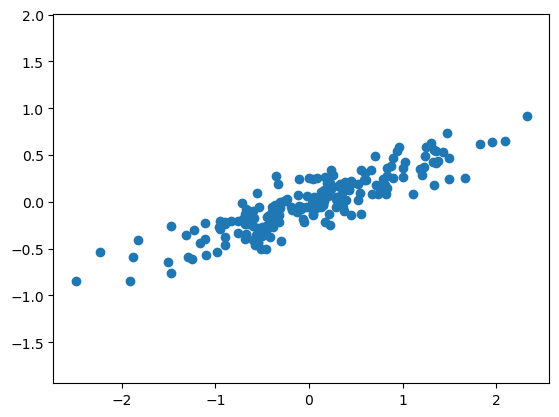

In [2]:
rng = np.random.RandomState(1)
A = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(A[:, 0], A[:, 1])
plt.axis('equal');

By eye, it is clear that there is a fairly strong linear relationship between the x and y variables. The unsupervised learning task is to explore the nature of the *relationship* between the x and y values.

In PCA, this relationship is quantified by finding a list of the *principal axes* in the data, and then use those axes to describe the dataset.  
Using Scikit-Learn's `PCA` estimator, we can compute this as follows:

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(A)

PCA(n_components=2)

The fit learns some characteristics from the data, most importantly the "components" and "explained variance":

In [4]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [5]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


To see what these numbers mean we can visualise them as vectors over the input data, using the "components" to define the direction of the vector (these are known as the 'eigenvectors'); we will use the "explained variance" to define the squared-length of these vectors...

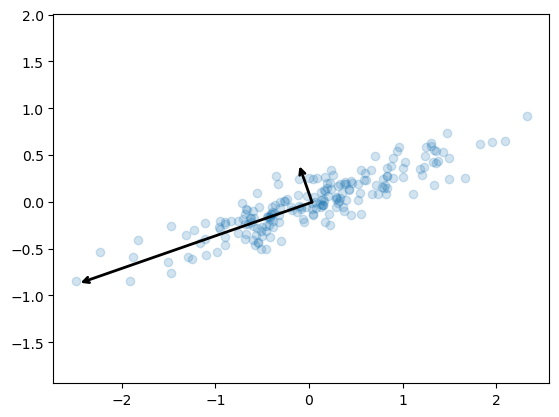

In [6]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(A[:, 0], A[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

These vectors represent the *principal axes* of the data, with the length of each vector providing an indication of how "important" that axis is in describing the distribution of the data.. more precisely, it is a measure of the variance of the data when projected onto that axis.

The projection of each data point onto the principal axes are the "principal components" of the data.


### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves removing one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

We can look at our example above to use PCA as a dimensionality reduction technique...

In [7]:
pca = PCA(n_components=1)
pca.fit(A)
A_pca = pca.transform(A)
print("original shape:   ", A.shape)
print("transformed shape:", A_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

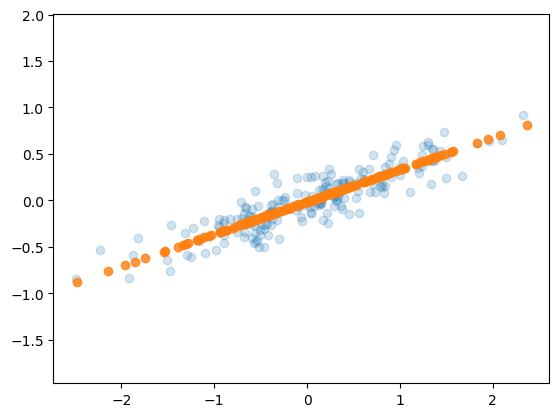

In [8]:
A_new = pca.inverse_transform(A_pca)
plt.scatter(A[:, 0], A[:, 1], alpha=0.2)
plt.scatter(A_new[:, 0], A_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data description space by 50%, the overall relationship between the data points are mostly preserved.

## Exercise 7a.1  (SUBMIT)

Hopefully it should be obvious that the utility of the PCA approach will depend to a large extend on the structure of the data (more specifically, the distribution of variance across the variables present). 

In most practical situations we will have more (often *many* more) than just 2 variables and we can use various approaches (such as a 'scree plot') to access the likely benefit of reducing to various numbers of principle components.

For now we will stick with two dimensions and see the extent to which PCA might be useful for the two examples shown below...

I have proposed that you generate two additional data sets {B} and {C} (below).
 - explore the data visually to get a sense for whether you might expect them to be good candidates for PCA reduction;
 - carry out analyses similar to those carried out above to confirm your assumptions.

Provide some comments on what you find for each of the data sets.


In [9]:
# Code to generate data-set {B}

rng = np.random.RandomState(1)
x = rng.normal(0, 1, 200)
y = 2*x + rng.normal(0, 0.25, 200)
B = np.vstack((x, y))
B_new = B.T

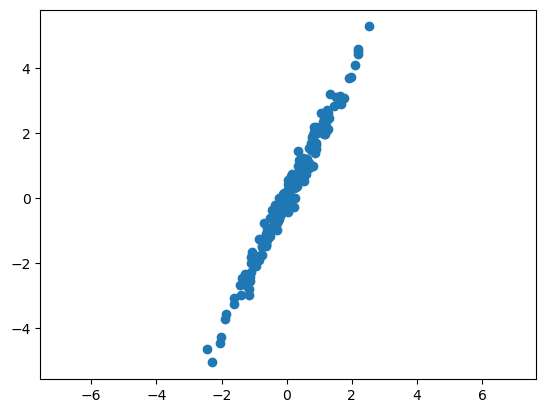

In [10]:
plt.scatter(B_new[:, 0], B_new[:, 1])
plt.axis('equal');

In [11]:
pca = PCA(n_components=2)
pca.fit(B_new)

PCA(n_components=2)

In [12]:
print(pca.components_)

[[-0.44388674 -0.8960829 ]
 [-0.8960829   0.44388674]]


In [13]:
print(pca.explained_variance_)

[4.16971251 0.0134057 ]


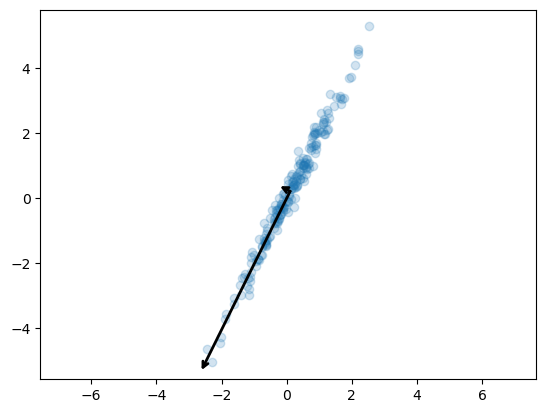

In [14]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(B_new[:, 0], B_new[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [15]:
#Transforming the data into a single dimension.
pca = PCA(n_components=1)
pca.fit(B_new)
B_pca = pca.transform(B_new)
print("original shape:   ", B_new.shape)
print("transformed shape:", B_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


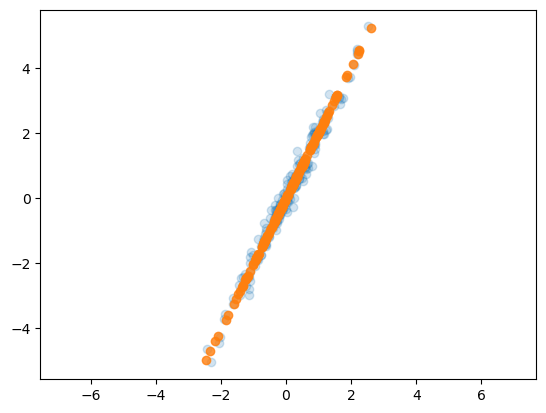

In [16]:
#We perform inverse transform on the single dimensional data and plot it 
#along the original data as to understand the effects of dimensionality reduction.

#The light points are the original data, while the dark points are the projected version.

B_int_new = pca.inverse_transform(B_pca)
plt.scatter(B_new[:, 0], B_new[:, 1], alpha=0.2)
plt.scatter(B_int_new[:, 0], B_int_new[:, 1], alpha=0.8)
plt.axis('equal');

The information along the slightly less important principal axis is removed, leaving only the data with the highest variance. The fraction of variance that is cut out is proportional to the spread of points about the line formed which is a measure of how much "information" is discarded in this reduction of dimensionality. There is a quite a high number of datapoints that have been discarded by which we can say that this dataset might not have been the best to test for PCA reduction.

In [17]:
# Code to generate data-set {C}

rng = np.random.RandomState(1)
x = rng.normal(0, 4, 200)
# y = (rng.normal(0, 8, 200) * (x - rng.normal(0, 3, 200)))/15
y = (rng.normal(0, 8, 200))/2
C = np.vstack((x, y))


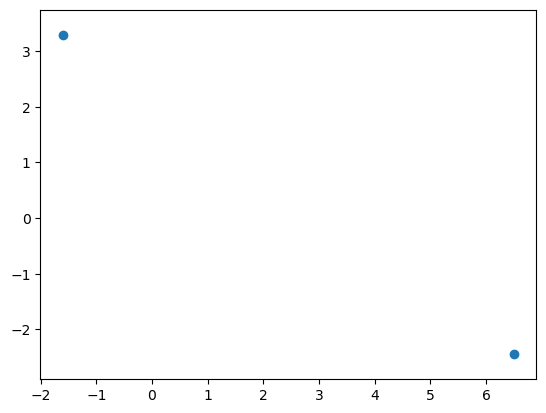

In [18]:
plt.scatter(C[:, 0], C[:, 1])
plt.axis('equal');

In [19]:
C_new = C.T
C_new.shape

(200, 2)

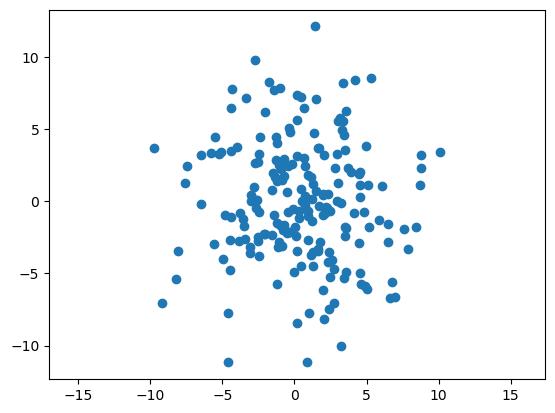

In [20]:
plt.scatter(C_new[:, 0], C_new[:, 1])
plt.axis('equal');

#From the below distribution we can clearly see that there is no strong linear relationship among the 
#x and y variables as the datapoints are scattered across the plot.

In [21]:
pca = PCA(n_components=2)
pca.fit(C_new)

PCA(n_components=2)

In [22]:
print(pca.components_)

[[-0.17857538  0.98392623]
 [-0.98392623 -0.17857538]]


In [23]:
print(pca.explained_variance_)

[17.36611798 13.18416779]


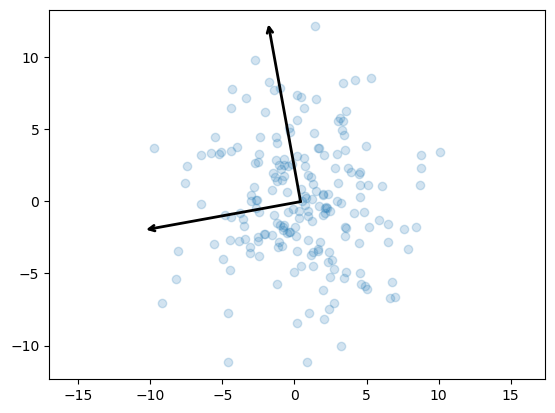

In [24]:
# plot data
plt.scatter(C_new[:, 0], C_new[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

In [25]:
#Transforming the data into a single dimension.
pca = PCA(n_components=1)
pca.fit(C_new)
C_pca = pca.transform(C_new)
print("original shape:   ", C_new.shape)
print("transformed shape:", C_pca.shape)

original shape:    (200, 2)
transformed shape: (200, 1)


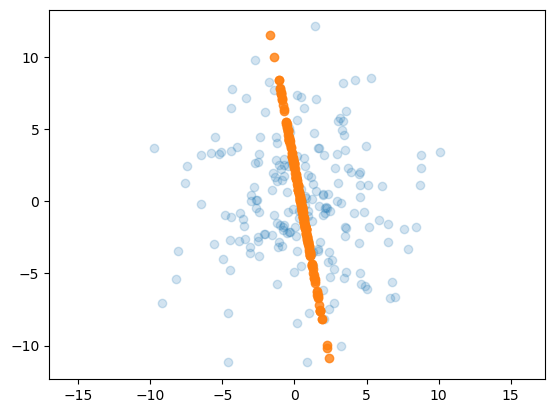

In [26]:
#We perform inverse transform on the single dimensional data and plot it 
#along the original data as to understand the effects of dimensionality reduction.

#The light points are the original data, while the dark points are the projected version.

C_int_new = pca.inverse_transform(C_pca)
plt.scatter(C_new[:, 0], C_new[:, 1], alpha=0.2)
plt.scatter(C_int_new[:, 0], C_int_new[:, 1], alpha=0.8)
plt.axis('equal');

As we could see in the first plot for dataset C, there was no clear linear relationship among the datapoints so there was almost no chance for the reduced-dimension dataset to encode any kind of relationships between the points. After reducing the dimension of the data description, we can see that there are are lot of datapoints that are being discarded which lie around the linear dark points.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be readily apparent when we are only looking at two dimensions; it becomes much more clear when looking at high-dimensional data.

One challenge that comes up in optical character recognition is the identification of hand-written digits. In the wild, this problem would involve both locating and identifying characters in an image. Here we have things a bit easier as *Scikit-Learn* provides a set of pre-formatted digits, built into the library.

We could begin by taking a look at these data:

In [27]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape


(1797, 8, 8)

The images data is a three-dimensional array: 1,797 samples each consisting of an 8 × 8 grid of pixels. We could visualise the first hundred of these:

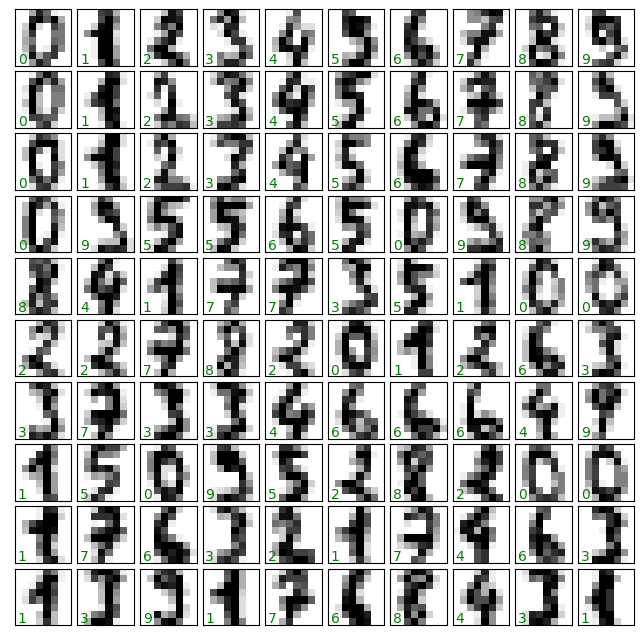

In [28]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')


In order to work with this data within our application of PCA in *Scikit-Learn*, we need a two-dimensional, [n_samples, n_features] representation. We can accomplish this by treating each pixel in the image as a feature: that is, by flattening out the pixel arrays so that we have a length-64 array of pixel values representing each digit. Additionally, we need the target array, which gives the previously determined label for each digit. These two quantities are built into the digits dataset under the `data` and `target` attributes, respectively:


In [29]:
# We could allocate the data to a 64-dimensional set of vectors [X]
X = digits.data
X.shape

(1797, 64)

In [30]:
# And a 1-dimensional set of vectors [Y] for the output (target)
y = digits.target
y.shape

(1797,)

We could now take the 64-dimensional data (for each 8×8 pixel image), and use PCA to project these on to a more manageable number of dimensions...  For example, just two:

In [31]:
pca = PCA(2)                                # this will project from 64 to 2 dimensions
projected = pca.fit_transform(X)
print(X.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot each of the points in terms of where they lie in this new 2-D space, as defined by the first two principal components taken from the data:

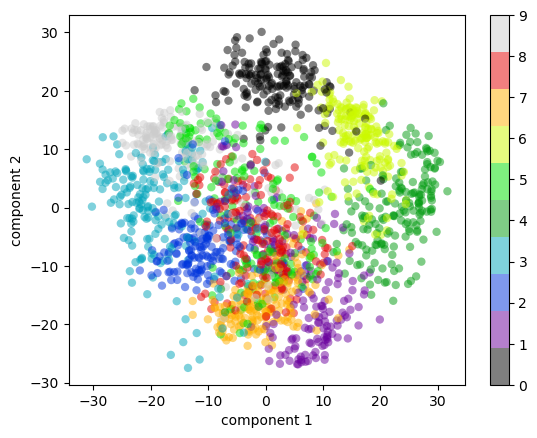

In [32]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data can be thought of as existing in a 64-dimensional point 'cloud', while this image is the projection of all data points into the dimensions accounting for the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner - i.e. without reference to the labels.

Of course the separation of digit is NOT perfect - but then we have 'lost' 62 dimensions of our data set!


### What do the components mean?

We can go a bit further here, and begin to ask what the reduced dimensions *mean*.
This meaning can be understood in terms of combinations of basis vectors.
For example, each image in the training set is defined by a collection of 64 pixel values, which we will call the vector $x$:

$$
x = [x_1, x_2, x_3 \cdots x_{64}]
$$

One way we can think about this is in terms of a pixel basis.
That is, to construct the image, we multiply each element of the vector by the pixel it describes, and then add the results together to build the image:

$$
{\rm image}(x) = x_1 \cdot{\rm (pixel~1)} + x_2 \cdot{\rm (pixel~2)} + x_3 \cdot{\rm (pixel~3)} \cdots x_{64} \cdot{\rm (pixel~64)}
$$

One way we might imagine reducing the dimension of this data is to zero out all but a few of these basis vectors.
For example, if we use only the first eight pixels, we get an eight-dimensional projection of the data, but it is not very reflective of the whole image: we've thrown out nearly 90% of the pixels!

(Sorry that the block of code below doesn't really have anything to do with PCA *per se* but is needed for the visualisation...)

In [33]:
def plot_pca_components(x, coefficients=None, mean=0, components=None,
                        imshape=(8, 8), n_components=8, fontsize=12,
                        show_mean=True):
    if coefficients is None:
        coefficients = x
        
    if components is None:
        components = np.eye(len(coefficients), len(x))
        
    mean = np.zeros_like(x) + mean
        

    fig = plt.figure(figsize=(1.2 * (5 + n_components), 1.2 * 2))
    g = plt.GridSpec(2, 4 + bool(show_mean) + n_components, hspace=0.3)

    def show(i, j, x, title=None):
        ax = fig.add_subplot(g[i, j], xticks=[], yticks=[])
        ax.imshow(x.reshape(imshape), interpolation='nearest')
        if title:
            ax.set_title(title, fontsize=fontsize)

    show(slice(2), slice(2), x, "True")
    
    approx = mean.copy()
    
    counter = 2
    if show_mean:
        show(0, 2, np.zeros_like(x) + mean, r'$\mu$')
        show(1, 2, approx, r'$1 \cdot \mu$')
        counter += 1

    for i in range(n_components):
        approx = approx + coefficients[i] * components[i]
        show(0, i + counter, components[i], r'$c_{0}$'.format(i + 1))
        show(1, i + counter, approx,
             r"${0:.2f} \cdot c_{1}$".format(coefficients[i], i + 1))
        if show_mean or i > 0:
            plt.gca().text(0, 1.05, '$+$', ha='right', va='bottom',
                           transform=plt.gca().transAxes, fontsize=fontsize)

    show(slice(2), slice(-2, None), approx, "Approx")
    return fig


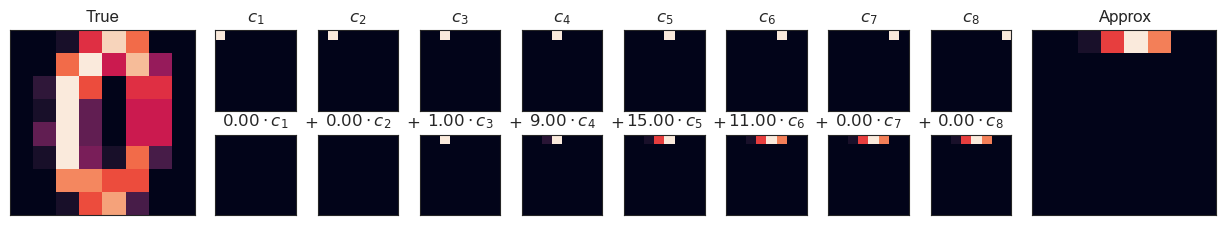

In [34]:
from sklearn.datasets import load_digits

digits = load_digits()
sns.set_style('white')

fig = plot_pca_components(digits.data[10],
                          show_mean=False)


The upper row of panels shows the individual pixels, and the lower row shows the cumulative contribution of these pixels to the construction of the image.
Using only eight of the pixel-basis components, we can only construct a small portion of the 64-pixel image.
Were we to continue this sequence and use all 64 pixels, we would recover the original image.

But the pixel-wise representation is not the only choice of basis. We can also use other basis functions, which each contain some pre-defined contribution from each pixel, and write something like

$$
image(x) = {\rm mean} + x_1 \cdot{\rm (basis~1)} + x_2 \cdot{\rm (basis~2)} + x_3 \cdot{\rm (basis~3)} \cdots
$$

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset.
The principal components, which act as the low-dimensional representation of our data, are simply the coefficients that multiply each of the elements in this series.
The figure below shows a similar depiction of reconstructing this digit using the mean plus the first eight PCA basis functions:

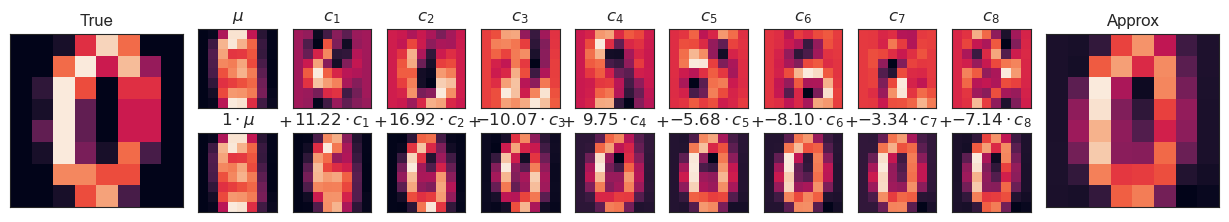

In [35]:
pca = PCA(n_components=8)
Xproj = pca.fit_transform(digits.data)
sns.set_style('white')
fig = plot_pca_components(digits.data[10], Xproj[10],
                          pca.mean_, pca.components_)


Unlike the pixel basis, the PCA basis allows us to recover the salient features of the input image with just a mean plus eight components!
The amount of each pixel in each component is the corollary of the orientation of the vector in our two-dimensional example.
This is the sense in which PCA provides a low-dimensional representation of the data: it discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

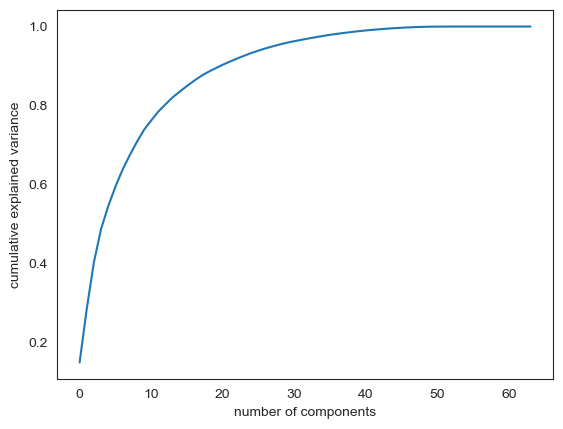

In [36]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

This curve quantifies how much of the total, 64-dimensional variance is contained within the first $N$ components.
For example, we see that for this example the first 10 components contain approximately 75% of the variance, while by the time you use around 40 components you can describe more than 95% of the variance.

We can also see that our **two-dimensional projection** led to the lose of a lot of information (as measured by the explained variance). Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present across multiple features.


Before continuing our exploration of PCA, there is in fact an alternative approach that works even better in terms of creating a 2-D visualisation of this 64-dimensional space. This is one of the 'manifold' learning algorithm called `Isomap` which we can use on this same digits data set...


In [37]:
# This algorithm is doing a fair amount of work, so there may be a delay of a few seconds before you see any results...
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

c:\Users\Nikit\anaconda3\envs\myenv\lib\site-packages\sklearn\manifold\_isomap.py:328: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\Users\Nikit\anaconda3\envs\myenv\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


(1797, 2)

As in the case of our PCA example we see again that the projected data is two-dimensional. Let's plot this data to see how the transformation has worked for the `Isomap` approach...



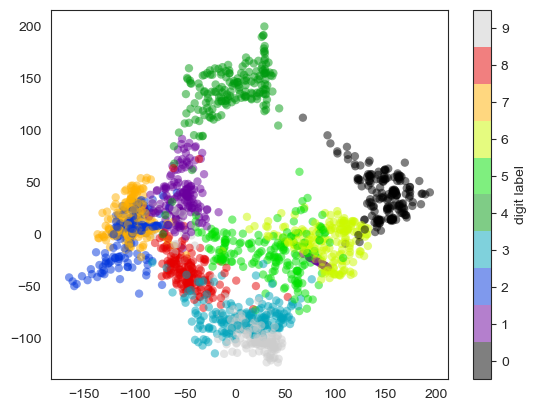

In [38]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

Without even doing too much formal analyses it would appear that for this 'digits' data set the `Isomap` approach gives a better option (at least at the level of just 2 dimensions) than does the `PCA` approach...  However, we can still see that there is a fair bit of 'confusion', for example, between the '2' and '7' digits, as well as between the '5' and '6's, and a number of others. 


## PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data.
The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise.
So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this works for our 'digits' data.
First we will plot the first 40 examples in their 'noise-free' state:

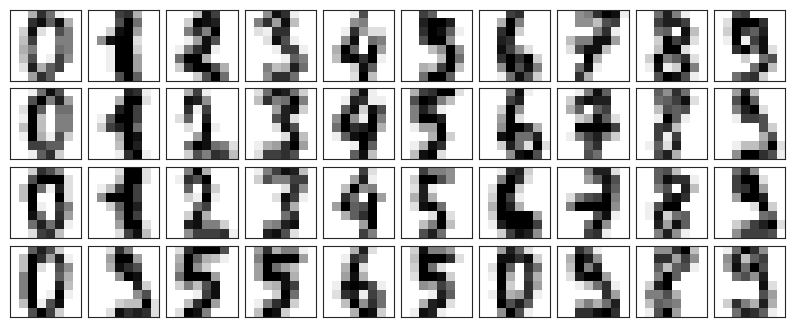

In [39]:
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

Now we could add some random noise to create a noisy dataset, and re-plot these first 40 samples:

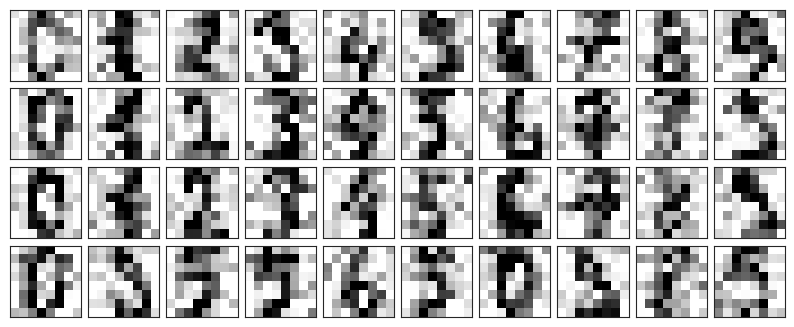

In [40]:
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's fairly clear to the naked eye that these revised images are quite noisy (they contain quite a number of spurious pixels).

We could now run a PCA algorithm, this time not limited to just 2 dimensions, but rather continuing to add components until over 50% of the variance had been retained.


In [41]:
pca = PCA(0.50).fit(noisy)
pca.n_components_

12

When we do this we find that around 50% of the variance can be accounted for by using 12 principal components.

Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits:

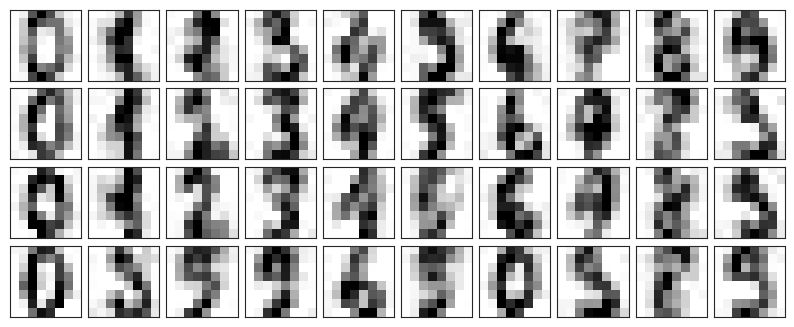

In [42]:
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

## Exercise 7a.2 (SUBMIT)

Look at the scree plot above and see how much of the variance was captured by 12 components in the digits prior to us adding the noise that we did.

Experiment a litte with this exercise, for example:

 - look at how many PCs would be need to account for 75% of the variance and see whether using that many PCs leads to better or worse removal of 'noise';
 - what about it you only account for a much lower level (say, 30%) of the variance?
  
 - look at the situation where you don't add quite so much noise to the digits and see what levels of variance (# of PCs) seem to work best to maintain clean, transformed digits.

Provide some comments/reflections on what you find relating to each of these questions.


In [43]:
pca1 = PCA(0.75).fit(noisy)
pca1.n_components_

31

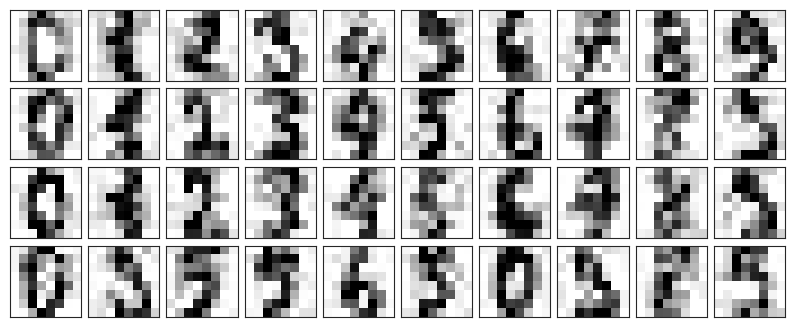

In [44]:
components1 = pca1.transform(noisy)
filtered1 = pca1.inverse_transform(components1)
plot_digits(filtered1)

To account for 75% of the variance, we needed 31 PCs and on using a high number of PCs when compared to the previous step led to a worse removal of noise levels in our generated image.

In [45]:
pca2 = PCA(0.30).fit(noisy)
pca2.n_components_

5

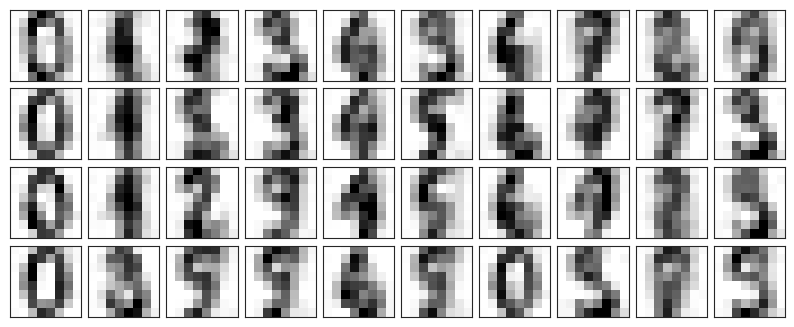

In [46]:
components2 = pca2.transform(noisy)
filtered2 = pca2.inverse_transform(components2)
plot_digits(filtered2)

For a very low level of variance(30%) we only required 5 PCs. When we compare the above two results clearly the images with low variance levels and low number of PCs have much less noise in them as opposed to the ones generated with higher level of variance accounted.

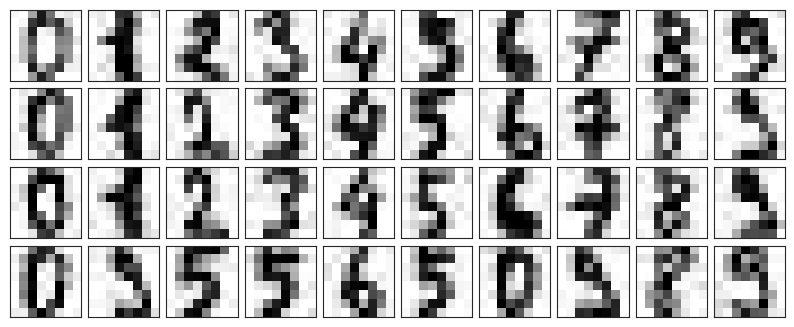

In [47]:
np.random.seed(42)
noisy3 = np.random.normal(digits.data, 1)
plot_digits(noisy3)

In [48]:
pca3 = PCA(0.70).fit(noisy3)
pca3.n_components_

10

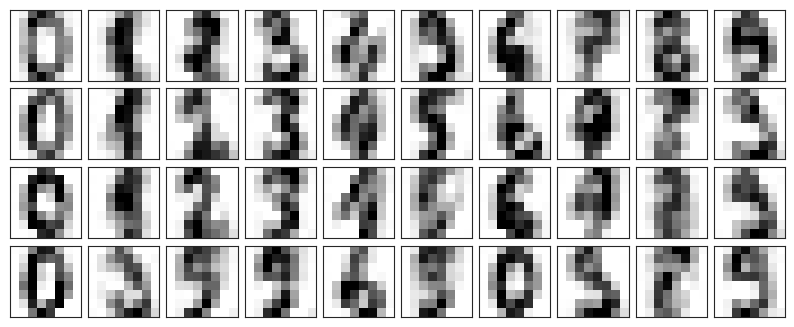

In [49]:
components3 = pca3.transform(noisy)
filtered3 = pca3.inverse_transform(components3)
plot_digits(filtered3)

## Example: Eigenfaces

There is one other interesting data set in *scikit-learn* that it is interesting to take a look at in terms of using PCA techniques, relating to facial recognition. (This comes from the *Labeled Faces in the Wild* dataset.)

**NB** - This is a pretty LARGE data set so it may take in the order of a few minutes to download.

You may also get a few "depricated use" messages, but these are simply for information - they should not stop the code from running...


In [50]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=40)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Arnold Schwarzenegger' 'Colin Powell' 'Donald Rumsfeld'
 'George W Bush' 'Gerhard Schroeder' 'Gloria Macapagal Arroyo'
 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien' 'Jennifer Capriati'
 'John Ashcroft' 'Junichiro Koizumi' 'Laura Bush' 'Lleyton Hewitt'
 'Luiz Inacio Lula da Silva' 'Serena Williams' 'Tony Blair'
 'Vladimir Putin']
(1867, 62, 47)


We will explore the principal axes that span this dataset. Because it is a large dataset, we will use `RandomizedPCA`— it contains a randomized method to approximate the first $N$ principal components much more quickly than the standard `PCA` estimator, and thus is very useful for high-dimensional data (here, our dimensionality is nearly 3,000 - i.e. 62 x 47).

We will take a look at the first 150 components:

In [52]:
from sklearn.decomposition import PCA as RandomizedPCA
pca = RandomizedPCA(150)
pca.fit(faces.data)

PCA(n_components=150)

In this case, it can be interesting to visualize the images associated with the first several principal components (these components are technically known as "eigenvectors,"
so these types of images are often called "eigenfaces").
As you can see in this figure, they are as creepy as they sound:

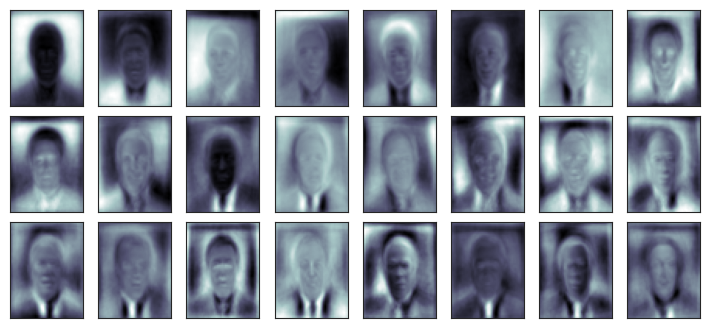

In [53]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

The results are very interesting, and give us insight into how the images vary: for example, the first few eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal vectors seem to be picking out certain features, such as eyes, noses, and lips.
Let's take a look at the cumulative variance of these components to see how much of the data information the projection is preserving:

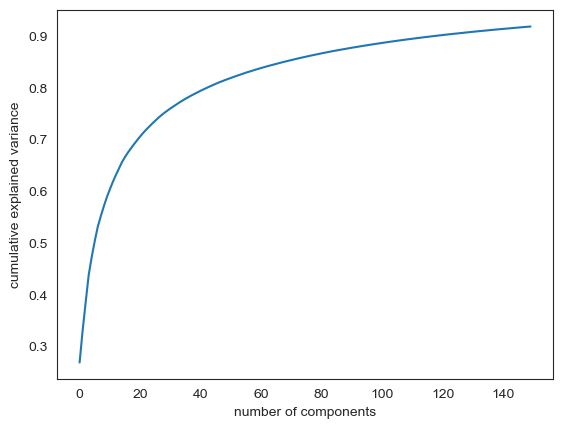

In [54]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

We see that these 150 components account for just over 90% of the variance.
That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.

To test this conjecture, we could compare the original input images with versions of the images reconstructed using just these 150 components:

In [55]:
# Compute the components and projected faces
pca = RandomizedPCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

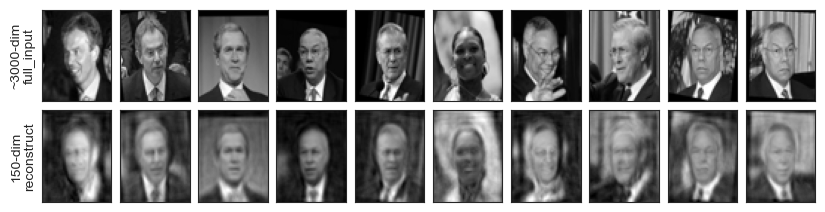

In [56]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('~3000-dim\nfull_input')
ax[1, 0].set_ylabel('150-dim\nreconstruct');

The top row here shows the original input images, while the bottom row shows reconstructions of the images using just the first 150 PCs (of the close to 3,000 initial 'dimensions').

This visualization suggest that a  PCA transformation would likely be a very successful feature selection method as a pre-processing step in some sort of image classification process. i.e. Although we have reduced the dimensionality of the data by a factor of 20, the projected images contain enough information that we might almost as easily, by eye, recognise the individuals in the transformed images.

What this means is that our classification algorithm would need to be trained only on 150-dimensional data rather than the initial ~3,000-dimensions, which depending on the particular algorithm we choose, could lead to much more efficient classification.

## Principal Component Analysis Summary

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data.
Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines.

Given any high-dimensional dataset, PCA can be a good 'first stop' technique to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the `eigenfaces`), and to understand the intrinsic dimensionality (by plotting the explained variance ratio).

Certainly PCA will not be useful for *every* high-dimensional data set, but it can often offer a straightforward and efficient path to gain insights into high-dimensional data.

PCA's main weakness is that it tends to be highly affected by outliers in the data. For this reason, more robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. *Scikit-Learn* contains a couple of interesting variants on PCA, including `RandomizedPCA` and `SparsePCA`, both in the `sklearn.decomposition` sub-module.

`RandomizedPCA` (which was actually what we used in the `eigenfaces` example above) uses a non-deterministic method to quickly approximate the first few principal components in very high-dimensional data, while `SparsePCA` introduces a regularization term that serves to enforce sparcity on the components.
